# **APPLE STOCK PREDICTION USING NEURAL NETWORK** 

---

Bidirectional long-short term memory(Bidirectional LSTM) is the process of making any neural network o have the sequence information in both directions backwards (future to past) or forward(past to future)

BRNN are really just putting two independent RNNs together. The input sequence is fed in normal time order for one network, and in reverse time order for another


* LSTM (Long Short Term Memory)
* BiLSTM (Bidirectional Long Short Term Memory)



In this project we are going to investigate price of the stock over time.
Thus, We attempt to predict future stock behavior
(Predicting the stock price of APPLE dataset from nasdaq using LSTM)

# APPLE dataset

## reading dataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
root='/gdrive/MyDrive/'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


**importing libraries**

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,SimpleRNN,Dropout
from keras.callbacks import History


import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM


import time #helper libraries
from sklearn.preprocessing import MinMaxScaler

from numpy import newaxis

import time

# For time stamps
from datetime import datetime


In [ ]:
pd.set_option('display.max_columns',None)  #to show all columns
data= pd.read_csv(root+'HistoricalData_1656020285091.csv',  parse_dates=True, index_col='Date', squeeze=True) #reading dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2022-06-22 to 2012-06-25
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  2515 non-null   object
 1   Volume      2515 non-null   int64 
 2   Open        2515 non-null   object
 3   High        2515 non-null   object
 4   Low         2515 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.9+ KB


In [ ]:
data.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-06-22,$135.35,73409230,$134.79,$137.76,$133.91
2022-06-21,$135.87,81000490,$133.42,$137.06,$133.32
2022-06-17,$131.56,134520300,$130.065,$133.079,$129.81
2022-06-16,$130.06,107961500,$132.08,$132.39,$129.04
2022-06-15,$135.43,91532970,$134.29,$137.34,$132.16


In [ ]:
cols=['Close/Last','Open', 'High', 'Low']

for c in cols:
  #convert strings to numbers in dataset
  data[c] = data[c].str.replace('$','').astype(float)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


With regard to datasets, we have to convert strings to numbers in order to make data ready for use in calculations:

In [ ]:
data.rename(columns={'Close/Last': 'Close'}, inplace=True)
data2 = data.copy()

In [ ]:
data.describe()

,Close,Volume,Open,High,Low
count,2515.000000,2.515000e+03,2515.000000,2515.000000,2515.000000
mean,55.707656,1.925358e+08,55.680871,56.290453,55.083896
std,44.822792,1.493591e+08,44.798605,45.373079,44.232292
min,13.947500,4.099995e+07,13.856100,14.271400,13.753600
25%,24.756250,9.765941e+07,24.721250,25.026250,24.572500
50%,37.512500,1.392250e+08,37.390000,37.817500,37.130000
75%,66.256250,2.318773e+08,65.937500,66.816250,65.416250
max,182.010000,1.457835e+09,182.630000,182.940000,179.120000


In [ ]:
X_train = data.drop(columns=['Close'])
data = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns = X_train.columns)

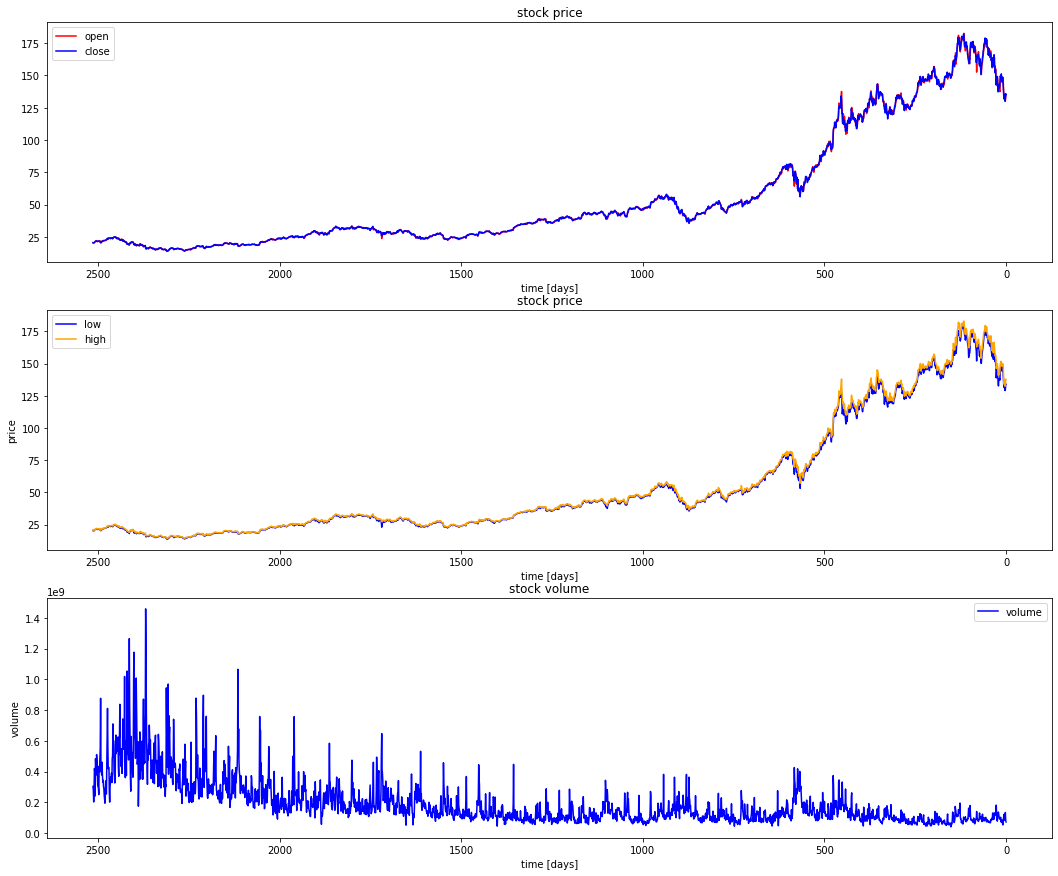

In [ ]:
plt.figure(figsize=(18,15));
plt.subplot(3,1,1)
plt.plot(data2['Open'].values, color='red', label='open')
plt.plot(data2['Close'].values, color='blue', label='close')
plt.gca().invert_xaxis()
plt.title('stock price')
plt.xlabel('time [days]')
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(data2['Low'].values, color='blue', label='low')
plt.plot(data2['High'].values, color='orange', label='high')
plt.gca().invert_xaxis()
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(3,1,3)
plt.plot(data2['Volume'].values, color='blue', label='volume')
plt.gca().invert_xaxis()
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [ ]:
APPLE=data2.copy()
n1Row, n1Col = APPLE.shape
print(f'There are {n1Row} rows and {n1Col} columns in apple Historical Quotes dataset')

There are 2515 rows and 5 columns in apple Historical Quotes dataset


In [ ]:
APPLE.head(5)

,Close,Volume,Open,High,Low
Date,,,,,
2022-06-22,135.35,73409230,134.790,137.760,133.91
2022-06-21,135.87,81000490,133.420,137.060,133.32
2022-06-17,131.56,134520300,130.065,133.079,129.81
2022-06-16,130.06,107961500,132.080,132.390,129.04
2022-06-15,135.43,91532970,134.290,137.340,132.16


In [ ]:
APPLE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2022-06-22 to 2012-06-25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2515 non-null   float64
 1   Volume  2515 non-null   int64  
 2   Open    2515 non-null   float64
 3   High    2515 non-null   float64
 4   Low     2515 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


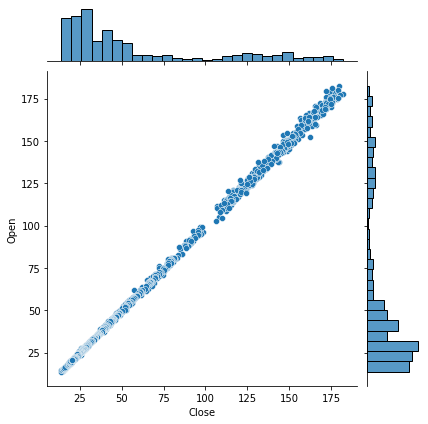

In [ ]:
import seaborn as sns
sns.jointplot(x=APPLE['Close'], y=APPLE['Open'])

## The total volume of stock which traded each day

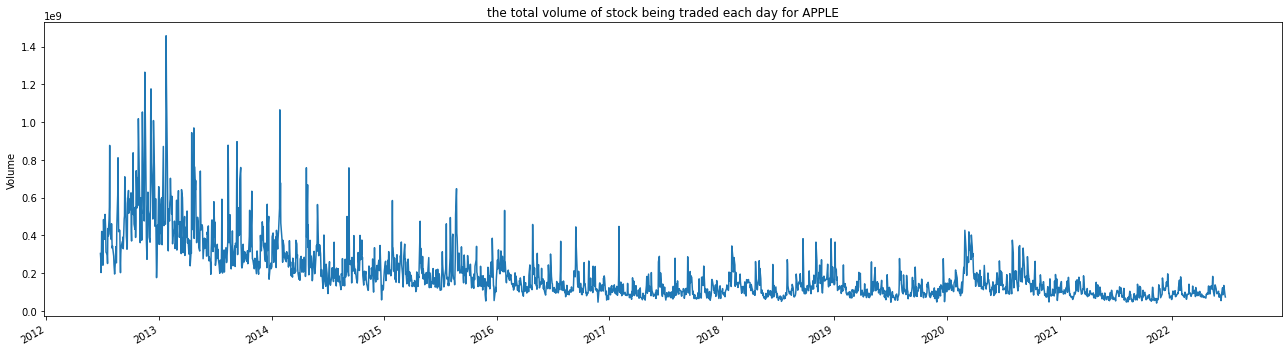

In [ ]:
plt.figure(figsize=(18,5))
APPLE['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
#plt.gca().invert_xaxis()
plt.title(f"the total volume of stock being traded each day for APPLE")
plt.rcParams["figure.figsize"] = (14,5)

plt.tight_layout()

moving averages

In [ ]:
ma_day = [10, 20, 50] #the most common moving averages

for ma in ma_day:
    column_name = f"MA for {ma} days"
    APPLE[column_name] = APPLE['Open'].rolling(ma).mean()

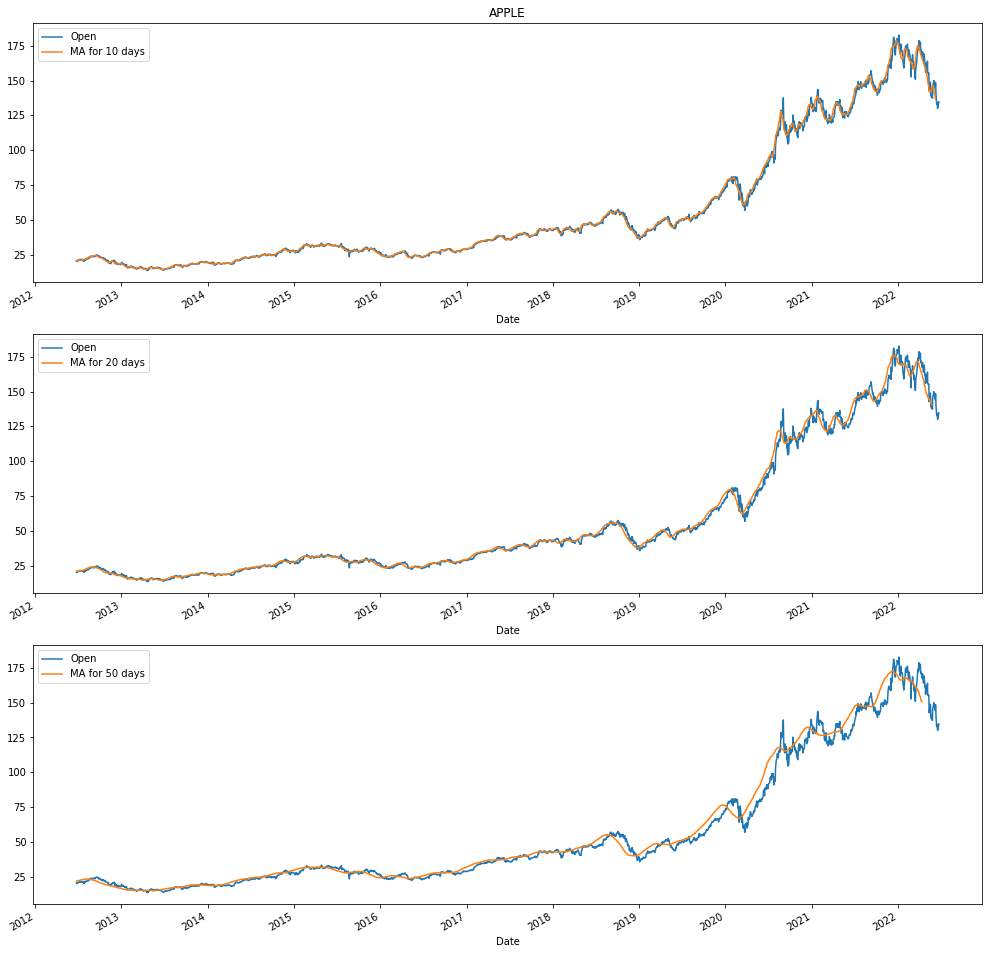

<Figure size 1224x720 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(18)
fig.set_figwidth(17)

plt.figure(figsize=(17, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

APPLE[['Open', 'MA for 10 days']].plot(ax=axes[0])
axes[0].set_title('APPLE')
APPLE[['Open','MA for 20 days']].plot(ax=axes[1])
APPLE[['Open','MA for 50 days']].plot(ax=axes[2])

Text(0.5, 1.0, 'APPLE')

<Figure size 1296x432 with 0 Axes>

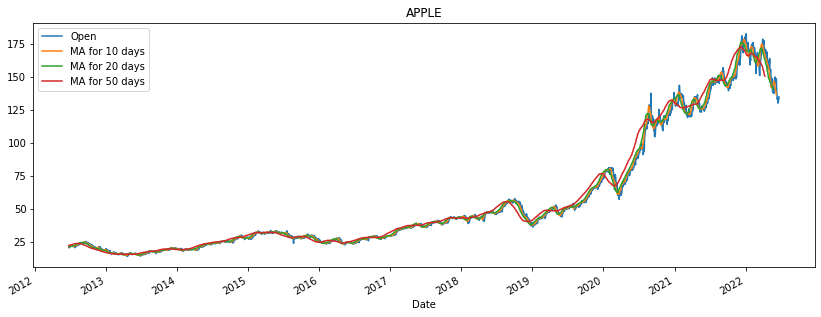

In [ ]:
plt.figure(figsize=(18,6));
#plt.size=(16,8)

p1=APPLE[['Open', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title('APPLE')

# FITTING APPLE DATASET TO MODEL

In [ ]:
data.head()

,Volume,Open,High,Low
0,0.022874,0.716544,0.732137,0.726607
1,0.028232,0.708426,0.727987,0.723039
2,0.066007,0.688548,0.704385,0.701814
3,0.047261,0.700487,0.700300,0.697157
4,0.035666,0.713581,0.729647,0.716025


In [ ]:
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2390

now we choose a specific stock feature ,drop feature: volume,normalize stock data ,then create train, validation and test data sets

Normalization is a very important part for any Recurrent Neural Network. For our LSTM model, normalization will play an important role. Normalization using MinMaxScaler will bring our entire datapoints between a minimum and a maximum value. For this purpose, we will use the values (0,1).

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(np.array(dataset).reshape(-1,1))

In [ ]:
x=data
y=MinMaxScaler().fit_transform(np.array(data2['Close']).reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_valid, y_train, y_valid  = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

x_train = (np.array(x_train)).reshape(x_train.shape[0],x_train.shape[1],1)
x_test = (np.array(x_test)).reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1509, 4, 1)
y_train.shape =  (1509, 1)
x_valid.shape =  (503, 4)
y_valid.shape =  (503, 1)
x_test.shape =  (503, 4, 1)
y_test.shape =  (503, 1)


## LSTM MODEL NO.1

In [ ]:
from keras.layers import Embedding

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(15212,64,input_length=x_train.shape[1]))
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1),
               activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, 
               kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
               bias_initializer='zeros', unit_forget_bias=True,
               dropout=0.2, recurrent_dropout=0.2, 
               return_state=False, go_backwards=False,))
model.add(Dropout(0.6))
model.add(LSTM(64,  return_sequences=True, input_shape= (x_train.shape[1], 1),
               activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, 
               kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
               bias_initializer='zeros', unit_forget_bias=True,
               kernel_constraint=None, recurrent_constraint=None, bias_constraint=None,
               recurrent_dropout=0.2, 
               return_state=False, go_backwards=False,))
model.add(Dropout(0.6))
model.add(LSTM(25 , return_sequences=True, input_shape= (x_train.shape[1], 1),
               activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, 
               kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
               bias_initializer='zeros', unit_forget_bias=True,
               kernel_constraint=None, recurrent_constraint=None, bias_constraint=None,
               recurrent_dropout=0.2, 
               return_state=False, go_backwards=False,))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

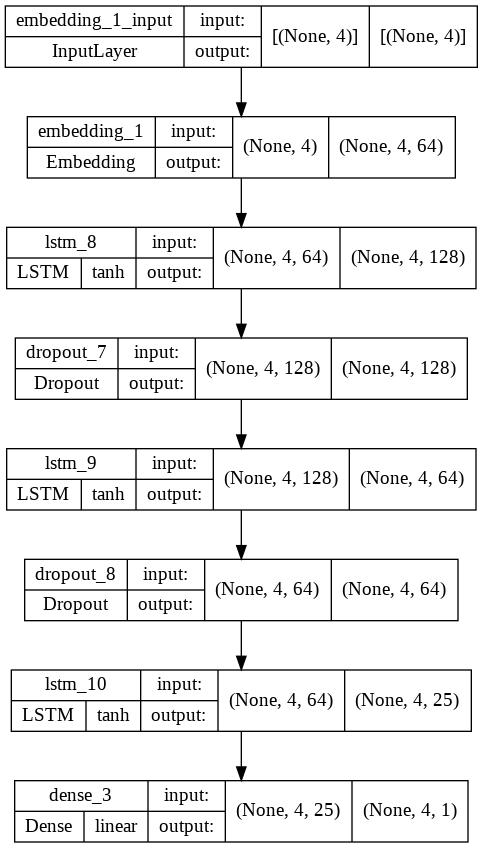

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,
                          show_dtype=False, show_layer_names=True,rankdir='TB',
                          expand_nested=False, dpi=96, layer_range=None,
                          show_layer_activations=True)

We now train our model with the training data over 50 epochs and with a batch size = 32

In [ ]:
# Train the model
history =model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=50, batch_size=32 ,validation_split=0.25,  verbose=1 , shuffle=True)

Epoch 1/50
36/36 [==============================] - 13s 66ms/step - loss: 0.0977 - accuracy: 8.8417e-04 - val_loss: 0.0882 - val_accuracy: 0.0000e+00
Epoch 2/50
36/36 [==============================] - 1s 41ms/step - loss: 0.0805 - accuracy: 8.8417e-04 - val_loss: 0.0818 - val_accuracy: 0.0000e+00
Epoch 3/50
36/36 [==============================] - 1s 40ms/step - loss: 0.0769 - accuracy: 8.8417e-04 - val_loss: 0.0784 - val_accuracy: 0.0000e+00
Epoch 4/50
36/36 [==============================] - 2s 63ms/step - loss: 0.0750 - accuracy: 8.8417e-04 - val_loss: 0.0773 - val_accuracy: 0.0000e+00
Epoch 5/50
36/36 [==============================] - 1s 40ms/step - loss: 0.0742 - accuracy: 8.8417e-04 - val_loss: 0.0767 - val_accuracy: 0.0000e+00
Epoch 6/50
36/36 [==============================] - 1s 40ms/step - loss: 0.0734 - accuracy: 8.8417e-04 - val_loss: 0.0763 - val_accuracy: 0.0000e+00
Epoch 7/50
36/36 [==============================] - 1s 40ms/step - loss: 0.0731 - accuracy: 8.8417e-04 - 

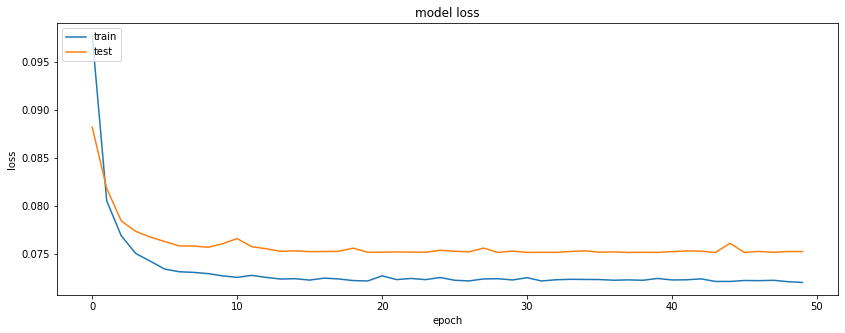

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


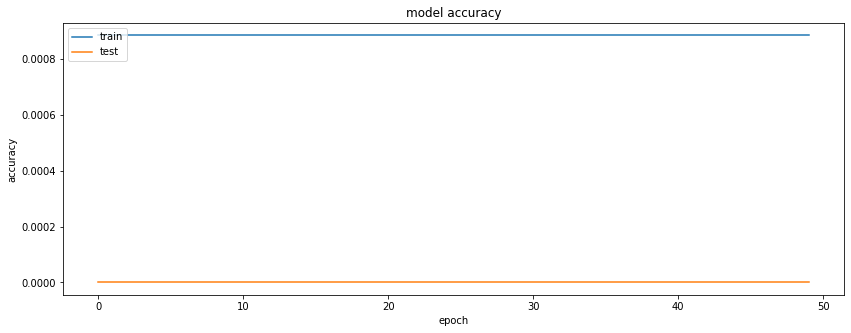

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense

# list all data in history
print(history.history.keys())

# summarize history for accuracy

plt.size=(16,8)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print('accuracy =',history.history['accuracy'][0])
print('Val accuracy =',history.history['val_accuracy'][0])

accuracy = 0.0008841733215376735
Val accuracy = 0.0


in the next part, we check model's prediction on the test data. We will store the prediction in y_pred, but as the data is scaled, so, we will inverse scale the data using scaler.inverse_transform() method.

It is clear that the data is a vector. Since MinMaxScaler works on numpy 2D arrays, not on vectors, So, we will convert data to 2D array and then apply the scaling.

In [ ]:
x_train.shape

(1509, 4, 1)

In [ ]:
nsamples, nx, ny = x_train.shape
d2_train_dataset = x_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = x_test.shape
d2_test_dataset = x_test.reshape((nsamples,nx*ny))

d2_train_dataset.shape , d2_test_dataset.shape

((1509, 4), (503, 4))

In [ ]:
train_predict = model.predict(x_train)
y_pred = model.predict(x_test)

## LSTM MODEL NO.2

In [ ]:
# Building Model:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 4, 50)             10400     
                                                                 
 dropout_9 (Dropout)         (None, 4, 50)             0         
                                                                 
 lstm_12 (LSTM)              (None, 4, 50)             20200     
                                                                 
 dropout_10 (Dropout)        (None, 4, 50)             0         
                                                                 
 lstm_13 (LSTM)              (None, 4, 50)             20200     
                                                                 
 dropout_11 (Dropout)        (None, 4, 50)             0         
                                                                 
 lstm_14 (LSTM)              (None, 50)               

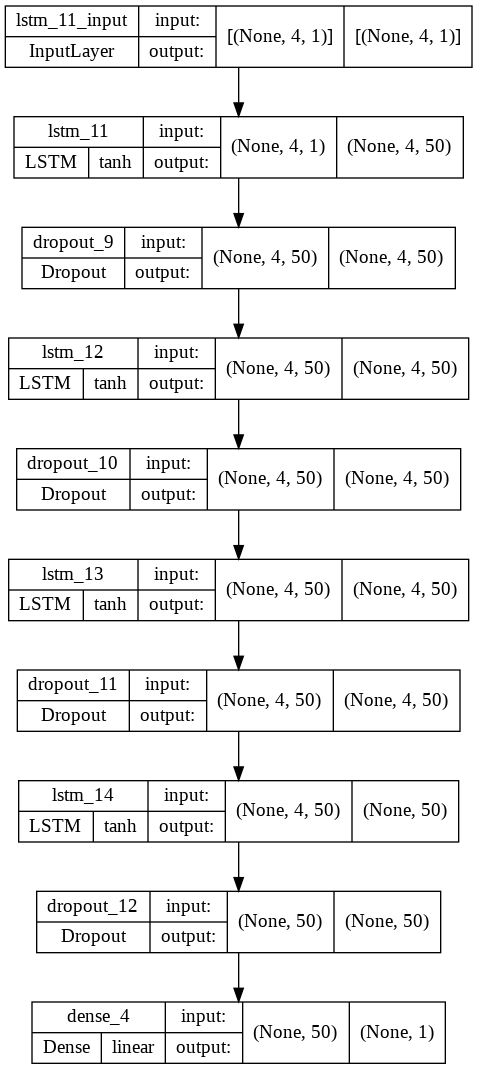

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,
                          show_dtype=False, show_layer_names=True,rankdir='TB',
                          expand_nested=False, dpi=96, layer_range=None,
                          show_layer_activations=True)

In [ ]:
start = time.time()
model.compile(loss='mse',  optimizer='adam', metrics=['accuracy'])
print ('compilation time : ', time.time() - start)

compilation time :  0.009710550308227539


Keras's fit() does not return the model but it returns a History object that contain per-epoch loss and metrics.

In [ ]:
history =model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100,batch_size=32,validation_split=0.25,  verbose=1 , shuffle=True)
 #model1.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.25,  verbose=1 , shuffle=True)

Epoch 1/100
36/36 [==============================] - 10s 60ms/step - loss: 0.0811 - accuracy: 8.8417e-04 - val_loss: 0.0561 - val_accuracy: 0.0000e+00
Epoch 2/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0270 - accuracy: 0.0018 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 3/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0103 - accuracy: 0.0018 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 4/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0090 - accuracy: 0.0018 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 5/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0065 - accuracy: 0.0018 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 6/100
36/36 [==============================] - 1s 16ms/step - loss: 0.0052 - accuracy: 0.0018 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 7/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0038 - accuracy: 0.0018 - val_loss: 9.7425e

In [ ]:
#history.history['val_accuracy'][:]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


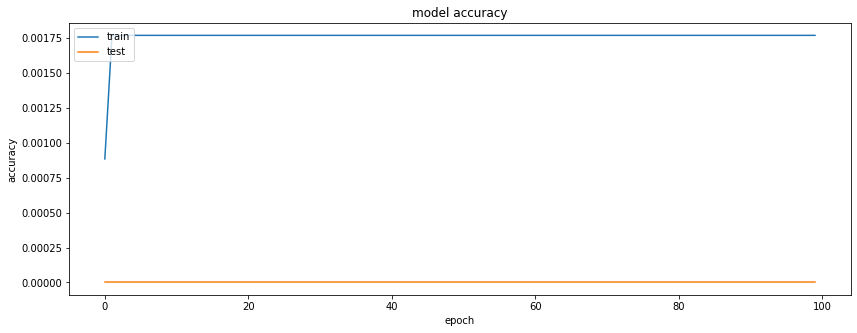

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense

# list all data in history
print(history.history.keys())

# summarize history for accuracy

plt.size=(16,8)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print('accuracy =',history.history['accuracy'][0])
print('Val accuracy =',history.history['val_accuracy'][0])

accuracy = 0.0008841733215376735
Val accuracy = 0.0


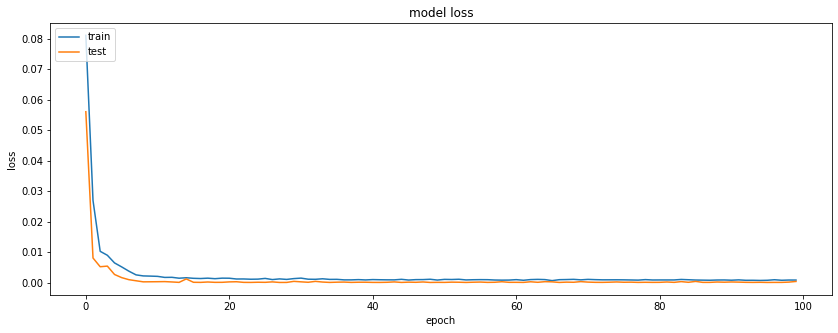

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## VISUlIZATION

now visualize the whole data, training and testing part in a single graph

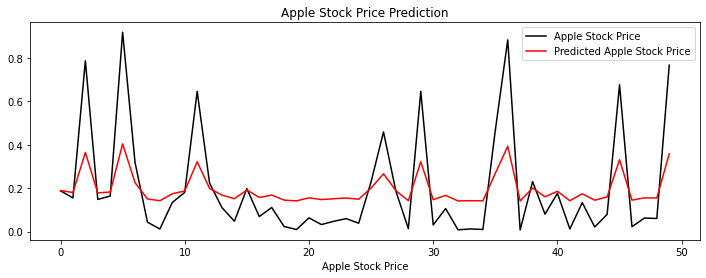

In [ ]:
# Predict the stock prices
predicted_stock_price1 = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_stock_price1)
plt.figure(figsize=(12, 4))


real_stock_price = x_train[:50 , 3:4]
pred=np.array(real_stock_price).reshape(-1, 1)
predicted_stock_price = model.predict(pred)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

nsamples, nx, ny = real_stock_price.shape
real_stock_price = real_stock_price.reshape((nsamples,nx*ny))

plt.plot(real_stock_price, color='black', label='Apple Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Apple Stock Price')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.xlabel('Apple Stock Price')
plt.legend()
plt.show()

## BI-LSTM MODEL

Build the bidirectional lstm model

In [ ]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='tanh'), input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.build((x_train.shape[1],1)) 
model.add(Dense(1))

In [ ]:
start = time.time()
model.compile(loss='mse',  optimizer='adam', metrics=['accuracy'])
print ('compilation time : ', time.time() - start)

compilation time :  0.017544031143188477


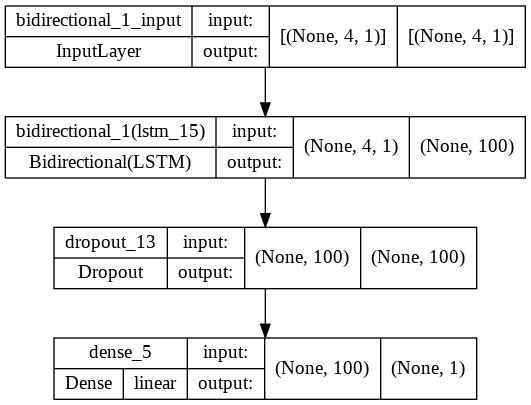

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,
                          show_dtype=False, show_layer_names=True,rankdir='TB',
                          expand_nested=False, dpi=96, layer_range=None,
                          show_layer_activations=True)

In [ ]:
history=model.fit(x_train, y_train, epochs=50, batch_size=32,validation_split=0.2,  verbose=1 , shuffle=True)

Epoch 1/50
38/38 [==============================] - 8s 29ms/step - loss: 0.0592 - accuracy: 8.2850e-04 - val_loss: 0.0172 - val_accuracy: 0.0000e+00
Epoch 2/50
38/38 [==============================] - 0s 13ms/step - loss: 0.0066 - accuracy: 0.0017 - val_loss: 6.2103e-04 - val_accuracy: 0.0000e+00
Epoch 3/50
38/38 [==============================] - 0s 13ms/step - loss: 0.0015 - accuracy: 0.0017 - val_loss: 8.3498e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 0.0017 - val_loss: 5.0511e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 0.0017 - val_loss: 3.9201e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
38/38 [==============================] - 0s 13ms/step - loss: 0.0011 - accuracy: 0.0017 - val_loss: 3.3687e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
38/38 [==============================] - 1s 14ms/step - loss: 0.0012 - accuracy: 0.0017 - val_l

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


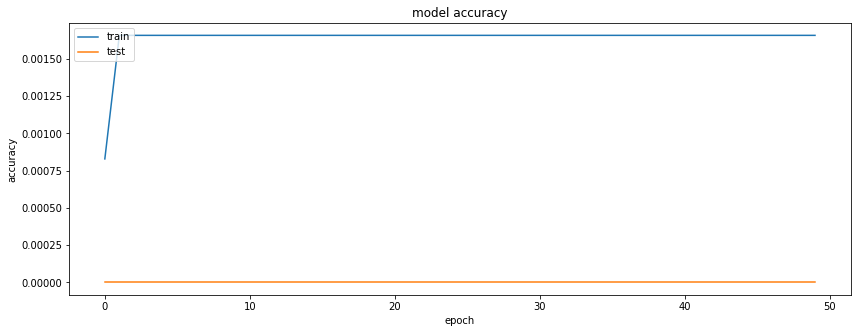

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense

# list all data in history
print(history.history.keys())

# summarize history for accuracy

plt.size=(16,8)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print('accuracy =',history.history['accuracy'][0])
print('Val accuracy =',history.history['val_accuracy'][0])

accuracy = 0.0008285004296340048
Val accuracy = 0.0


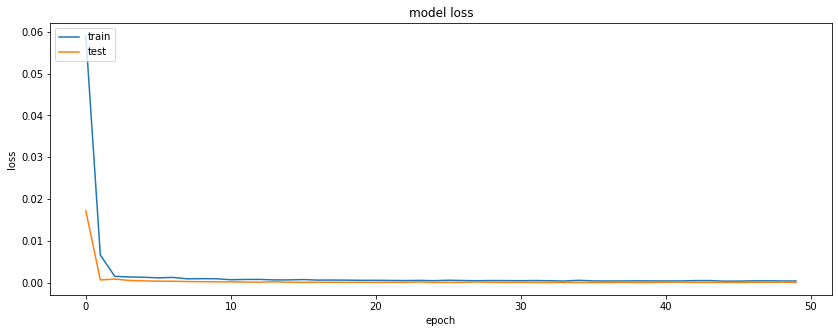

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_train.shape

(1509, 1)

In [ ]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform(y_train)

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(y_test)

## VISUALIZATION

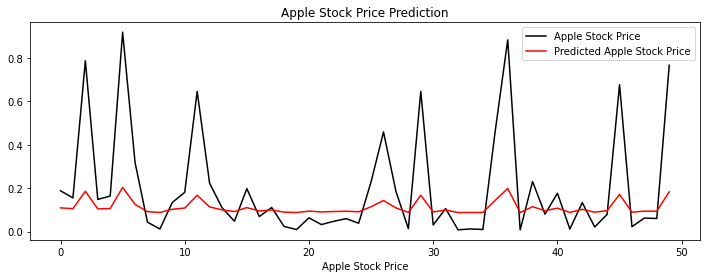

In [ ]:
# Predict the stock prices
predicted_stock_price1 = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_stock_price1)
plt.figure(figsize=(12, 4))


real_stock_price = x_train[:50 , 3:4]
pred=np.array(real_stock_price).reshape(-1, 1)
predicted_stock_price = model.predict(pred)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

nsamples, nx, ny = real_stock_price.shape
real_stock_price = real_stock_price.reshape((nsamples,nx*ny))

plt.plot(real_stock_price, color='black', label='Apple Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Apple Stock Price')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.xlabel('Apple Stock Price')
plt.legend()
plt.show()